In [1]:
import numpy as np
import scipy as sp
import matplotlib.pyplot as plt
import matplotlib
from pathlib import Path
matplotlib.style.use(Path('../style.mplstyle'))

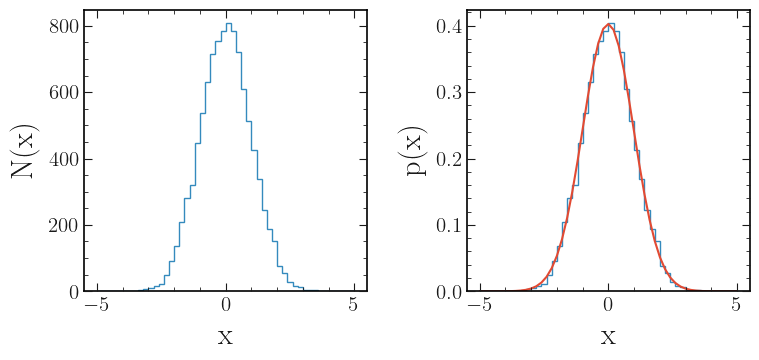

In [2]:
x = np.linspace(-5, 5, 51)
y = np.random.normal(0,1, (10000))
fig, ax = plt.subplots(1,2, figsize=(8,4))
fig.set_tight_layout("rect")
a = ax[0].hist(y, x, histtype="step")
ax[1].hist(y, x, histtype="step", density=True)
ax[1].plot(x, sp.stats.norm.pdf(x, np.mean(y), np.std(y)))
ax[0].set_xlabel('x')
ax[0].set_ylabel('N(x)')
ax[1].set_xlabel('x')
ax[1].set_ylabel('p(x)')
plt.savefig('figs/pdf_hist.pdf')


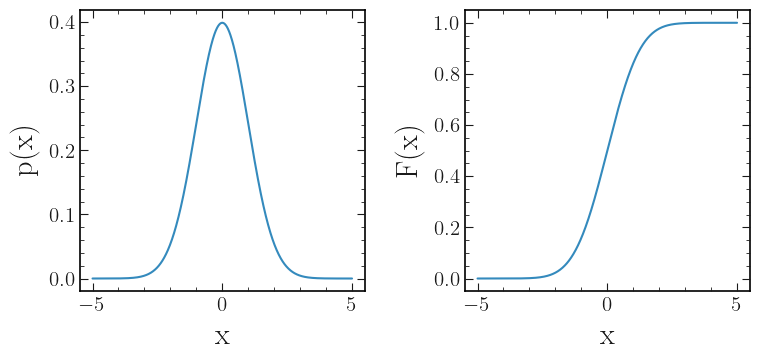

In [3]:
x = np.linspace(-5, 5, 1000)
y = np.random.normal(0,1, (10000))
fig, ax = plt.subplots(1,2, figsize=(8,4))
fig.set_tight_layout("rect")
ax[0].plot(x, sp.stats.norm.pdf(x, 0, 1))
ax[1].plot(x, sp.stats.norm.cdf(x, 0, 1))

ax[0].set_xlabel('x')
ax[0].set_ylabel('p(x)')
ax[1].set_xlabel('x')
ax[1].set_ylabel('F(x)')
plt.savefig('figs/cum_dist.pdf')

In [4]:
x, y = np.mgrid[-3:3:.01, -3:3:.01]

pos = np.dstack((x, y))

# covxy=-0.95
# rv = sp.stats.multivariate_normal([0, 0], [[1.0, covxy], [covxy, 1.0]])
# rvr = np.random.multivariate_normal([0, 0], [[1.0, covxy], [covxy, 1.0]], size=800)

fig, axs = plt.subplots(2,2, figsize=(8,8), sharex=True, sharey=True)
fig.tight_layout()

print(axs)

cov_val=[0, 0.5, 0.8, -0.8]
for i, ax in enumerate(fig.axes):
    covxy=cov_val[i]
    rv = sp.stats.multivariate_normal([0, 0], [[1.0, covxy], [covxy, 1.0]])
    rvr = np.random.multivariate_normal([0, 0], [[1.0, covxy], [covxy, 1.0]], size=600)
    ax.contour(x, y, rv.pdf(pos), 8, cmap='plasma')
    ax.plot(rvr[:, 0], rvr[:, 1], '.', alpha=0.3)
    ax.set_xlim((-3,3))
    ax.set_ylim((-3,3))

fig.axes[2].set_xlabel('x')
fig.axes[3].set_xlabel('x')
fig.axes[0].set_ylabel('y')
fig.axes[2].set_ylabel('y')

    
plt.savefig('figs/corr.pdf')



[[<Axes: > <Axes: >]
 [<Axes: > <Axes: >]]


[[ 1.         -0.00308452]
 [-0.00308452  1.        ]]


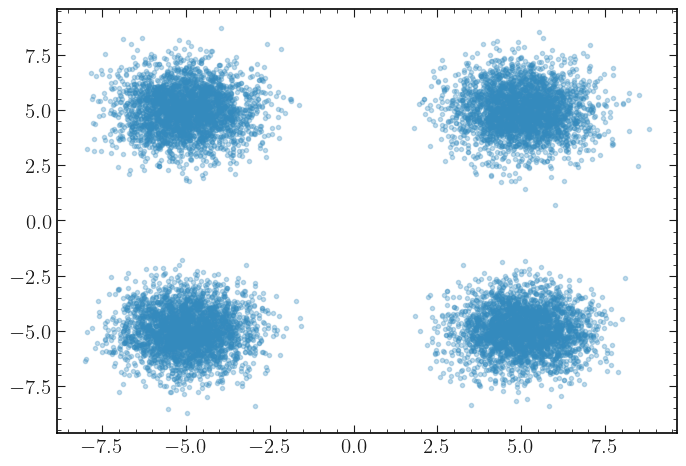

In [5]:
x = np.random.normal(0,1,10000)
y = np.sqrt(x**2)
np.corrcoef([x,y])

# rv = sp.stats.multivariate_normal([0, 0], [[1.0, covxy], [covxy, 1.0]])
rvr = np.concatenate((  np.random.multivariate_normal([-5, -5], [[1.0, 0], [0, 1.0]], size=3000),
                        np.random.multivariate_normal([-5,  5], [[1.0, 0], [0, 1.0]], size=3000),
                        np.random.multivariate_normal([ 5, -5], [[1.0, 0], [0, 1.0]], size=3000),
                        np.random.multivariate_normal([ 5,  5], [[1.0, 0], [0, 1.0]], size=3000),))
print(np.corrcoef(rvr.T))
# plt.contour(x, y, rv.pdf(pos), 8, cmap='plasma')
plt.plot(rvr[:, 0], rvr[:, 1], '.', alpha=0.3)


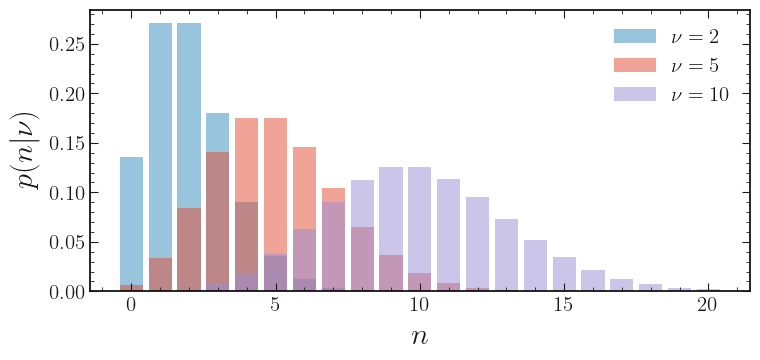

In [6]:
x = np.linspace(0, 20, 21)

fig, ax = plt.subplots(1,1, figsize=(8,4))
fig.set_tight_layout("rect")
ax.bar(x, sp.stats.poisson.pmf(x, 2), label=r'$\nu=2$',  alpha=0.5)
ax.bar(x, sp.stats.poisson.pmf(x, 5), label=r'$\nu=5$',  alpha=0.5)
ax.bar(x, sp.stats.poisson.pmf(x, 10), label=r'$\nu=10$',alpha=0.5)


ax.set_xlabel(r'$n$')
ax.set_ylabel(r'$p(n|\nu)$')
ax.legend()

plt.savefig('figs/poisson_dist.pdf')

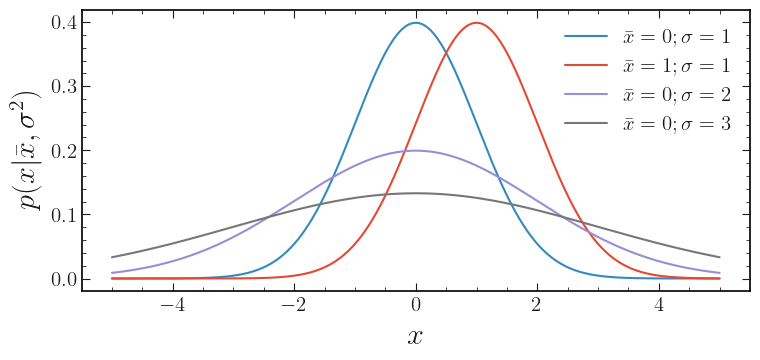

In [7]:
x = np.linspace(-5, 5, 1000)

fig, ax = plt.subplots(1,1, figsize=(8,4))
fig.set_tight_layout("rect")
ax.plot(x, sp.stats.norm.pdf(x, 0, 1), label=r'$\bar x =0; \sigma = 1$')
ax.plot(x, sp.stats.norm.pdf(x, 1, 1), label=r'$\bar x =1; \sigma = 1$')
ax.plot(x, sp.stats.norm.pdf(x, 0, 2), label=r'$\bar x =0; \sigma = 2$')
ax.plot(x, sp.stats.norm.pdf(x, 0, 3), label=r'$\bar x =0; \sigma = 3$')


ax.set_xlabel(r'$x$')
ax.set_ylabel(r'$p(x|\bar x, \sigma^2)$')
ax.legend()

plt.savefig('figs/gauss_dist.pdf')

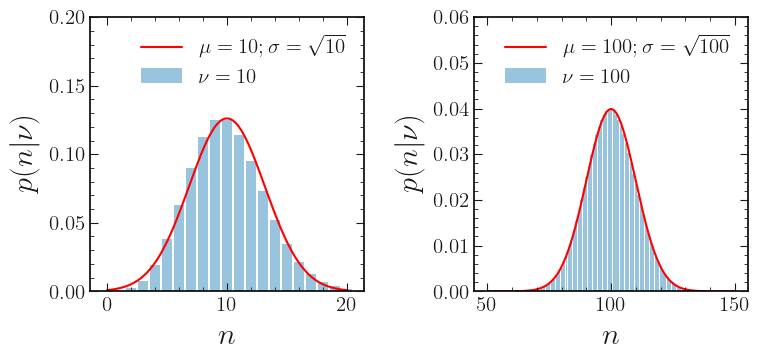

In [8]:

fig, ax = plt.subplots(1,2, figsize=(8,4))
fig.set_tight_layout("rect")
x = np.linspace(0, 20, 21)
ax[0].bar(x, sp.stats.poisson.pmf(x, 10), label=r'$\nu=10$', alpha=0.5)
x = np.linspace(0, 20, 1000)
ax[0].plot(x, sp.stats.norm.pdf(x, 10, np.sqrt(10)), 'r', label=r'$\mu=10; \sigma = \sqrt{10}$')
ax[0].set_xlabel(r'$n$')
ax[0].set_ylabel(r'$p(n|\nu)$')
ax[0].set_ylim((0, 0.2))
ax[0].legend()

x = np.linspace(50, 150, 101)
ax[1].bar(x, sp.stats.poisson.pmf(x, 100), label=r'$\nu=100$', alpha=0.5, width=0.8)
x = np.linspace(50, 150, 1000)
ax[1].plot(x, sp.stats.norm.pdf(x, 100, np.sqrt(100)), 'r', label=r'$\mu=100; \sigma = \sqrt{100}$')
ax[1].set_xlabel(r'$n$')
ax[1].set_ylabel(r'$p(n|\nu)$')
ax[1].set_ylim((0, 0.06))
ax[1].legend()

plt.savefig('figs/clt.pdf')

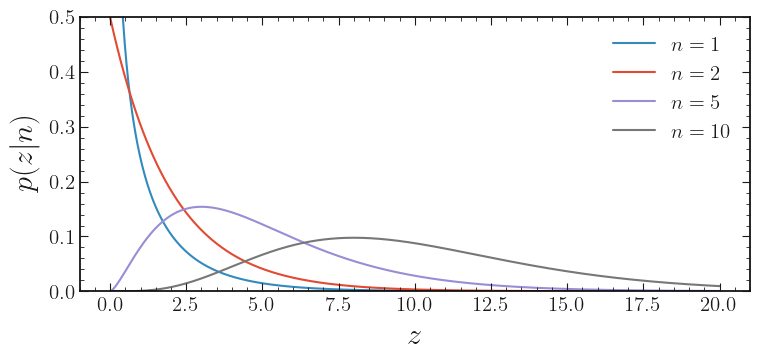

In [9]:
x = np.linspace(0, 20, 1000)

fig, ax = plt.subplots(1,1, figsize=(8,4))
fig.set_tight_layout("rect")
ax.plot(x, sp.stats.chi2.pdf(x, 1), label=r'$n = 1$')
ax.plot(x, sp.stats.chi2.pdf(x, 2), label=r'$n = 2$')
ax.plot(x, sp.stats.chi2.pdf(x, 5), label=r'$n = 5$')
ax.plot(x, sp.stats.chi2.pdf(x, 10),label=r'$n = 10$')
ax.set_ylim(0,0.5)

ax.set_xlabel(r'$z$')
ax.set_ylabel(r'$p(z|n)$')
ax.legend()

plt.savefig('figs/chi2_dist.pdf')

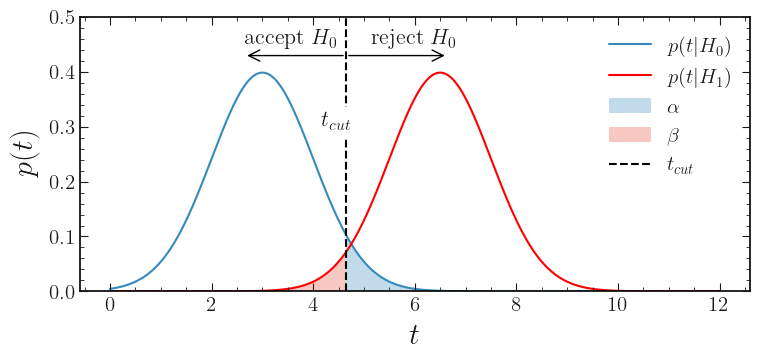

In [10]:
x = np.linspace(0, 12, 1000)

fig, ax = plt.subplots(1,1, figsize=(8,4))
fig.set_tight_layout("rect")

ax.plot(x, sp.stats.norm.pdf(x, 3, 1), label=r'$p(t|H_0)$')
ax.plot(x, sp.stats.norm.pdf(x, 6.5, 1), 'r', label=r'$p(t|H_1)$')

t_cut = sp.stats.norm.ppf(1-0.05, 3,1)

gx = np.linspace(t_cut, 12, 100)
plt.fill_between(gx, sp.stats.norm.pdf(gx, 3, 1), alpha=0.3, label = r'$\alpha$')
gx = np.linspace(0, t_cut, 100)
plt.fill_between(gx, sp.stats.norm.pdf(gx, 6.5, 1), alpha=0.3, label = r'$\beta$')

ax.axvline(x = t_cut, linestyle='--', color = 'k', label = r'$t_{cut}$')
ax.text(t_cut-0.5, 0.3, r'$t_{cut}$', backgroundcolor='white', fontsize=16)
ax.text(t_cut-2, 0.45, r'accept $H_0$', fontsize=16)
ax.text(t_cut+0.5, 0.45, r'reject $H_0$', fontsize=16)
ax.annotate("", xy=(t_cut-2, 0.43), xytext=(t_cut, 0.43), arrowprops=dict(arrowstyle="->"))
ax.annotate("", xy=(t_cut+2, 0.43), xytext=(t_cut, 0.43), arrowprops=dict(arrowstyle="->"))

# ax.set_xlim((0,1))
ax.set_ylim((0,0.5))
# extraticks = [5]
# ax.set_xticks(list(ax.get_xticks()) + [6.5], labels=list(ax.get_xticklabels())+[r'$t_{cut}$'])


ax.set_xlabel(r'$t$')
ax.set_ylabel(r'$p(t)$')
ax.legend()

plt.savefig('figs/test_stat.pdf')

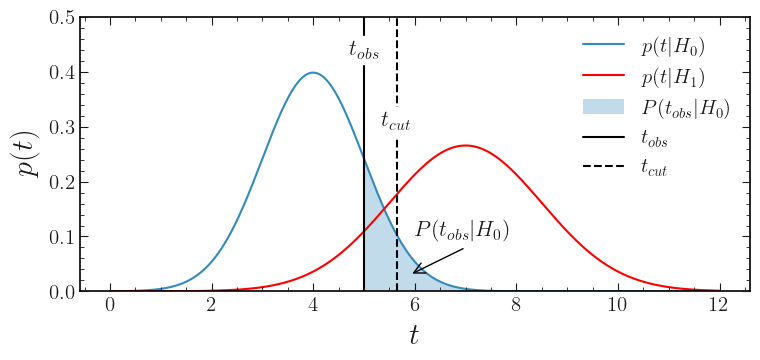

In [11]:
x = np.linspace(0, 12, 1000)

fig, ax = plt.subplots(1,1, figsize=(8,4))
fig.set_tight_layout("rect")

ax.plot(x, sp.stats.norm.pdf(x,4,1), label=r'$p(t|H_0)$')
ax.plot(x, sp.stats.norm.pdf(x, 7, 1.5), 'r', label=r'$p(t|H_1)$')

# Shade the region under the Gaussian curve
gx = np.linspace(5, 10, 100)
plt.fill_between(gx, sp.stats.norm.pdf(gx, 4, 1), alpha=0.3, label = r'$P(t_{obs}|H_0)$')
# gx = np.linspace(0, 5, 100)
# plt.fill_between(gx, sp.stats.norm.pdf(gx, 7, 1.5), alpha=0.3, label = r'$1-P(t_{obs}|H_1)$')


# # Shade the region under the Gaussian curve
# gx = np.linspace(0, 5, 100)
# plt.fill_between(gx, sp.stats.norm.pdf(gx, 7, 1.5), alpha=0.3)

ax.axvline(x = 5, label = r'$t_{obs}$', color='k')
ax.text(5-0.3, 0.43, r'$t_{obs}$', backgroundcolor='white', fontsize=16)

ax.text(6, 0.1, r'$P(t_{obs}|H_0)$', fontsize=16)
ax.annotate("", xy=(5.9, 0.03), xytext=(7.0, 0.08), arrowprops=dict(arrowstyle="->"))

# ax.text(2.6, 0.1, r'$1-P(t_{obs}|H_1)$')
# ax.annotate("", xy=(4.4, 0.03), xytext=(3.5, 0.08), arrowprops=dict(arrowstyle="->"))

plt.axvline(sp.stats.norm.ppf(1-0.05, 4, 1), linestyle='--', color='k', label = r'$t_{cut}$')
ax.text(sp.stats.norm.ppf(1-0.05, 4, 1)-0.3, 0.3, r'$t_{cut}$', backgroundcolor='white', fontsize=16)


ax.set_ylim((0,0.5))
# extraticks = [5]
# ax.set_xticks(list(ax.get_xticks()) + [6.5], labels=list(ax.get_xticklabels())+[r'$t_{cut}$'])


ax.set_xlabel(r'$t$')
ax.set_ylabel(r'$p(t)$')
ax.legend()

plt.savefig('figs/p_value.pdf')

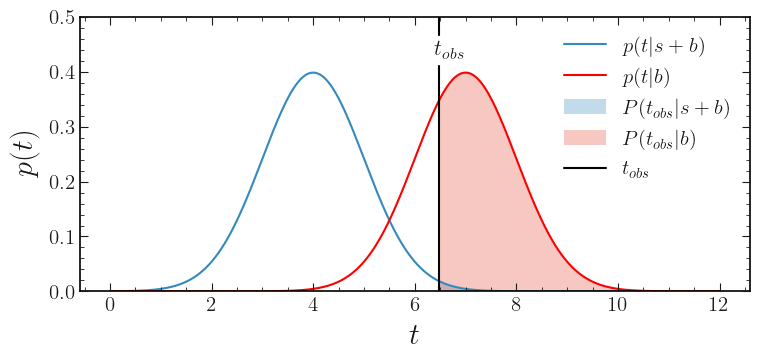

In [12]:
x = np.linspace(0, 12, 1000)

fig, ax = plt.subplots(1,1, figsize=(8,4))
fig.set_tight_layout("rect")

cut = sp.stats.norm.ppf(1-0.7, 7, 1)

ax.plot(x, sp.stats.norm.pdf(x,4,1), label=r'$p(t|s+b)$')
ax.plot(x, sp.stats.norm.pdf(x,7,1), 'r', label=r'$p(t|b)$')


# Shade the region under the Gaussian curve
gx = np.linspace(cut, 12, 100)
plt.fill_between(gx, sp.stats.norm.pdf(gx, 4, 1), alpha=0.3, label = r'$P(t_{obs}|s+b)$')
plt.fill_between(gx, sp.stats.norm.pdf(gx, 7, 1), alpha=0.3, label = r'$P(t_{obs}|b)$')


# # Shade the region under the Gaussian curve
# gx = np.linspace(0, 5, 100)
# plt.fill_between(gx, sp.stats.norm.pdf(gx, 7, 1.5), alpha=0.3)


plt.axvline(cut, color='k', label = r'$t_{obs}$')
ax.text(cut-0.1, 0.43, r'$t_{obs}$', backgroundcolor='white', fontsize=16)

ax.set_ylim((0,0.5))
# extraticks = [5]
# ax.set_xticks(list(ax.get_xticks()) + [6.5], labels=list(ax.get_xticklabels())+[r'$t_{cut}$'])


ax.set_xlabel(r'$t$')
ax.set_ylabel(r'$p(t)$')
ax.legend()

plt.savefig('figs/cls_separated.pdf')

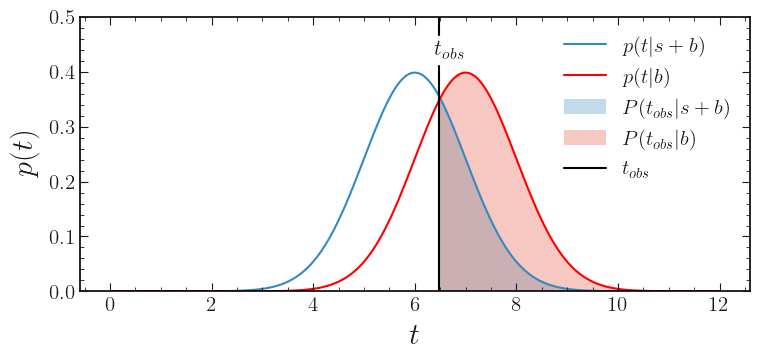

In [13]:
x = np.linspace(0, 12, 1000)

fig, ax = plt.subplots(1,1, figsize=(8,4))
fig.set_tight_layout("rect")

cut = sp.stats.norm.ppf(1-0.7, 7, 1)

ax.plot(x, sp.stats.norm.pdf(x,6,1), label=r'$p(t|s+b)$')
ax.plot(x, sp.stats.norm.pdf(x,7,1), 'r',  label=r'$p(t|b)$')


# Shade the region under the Gaussian curve
gx = np.linspace(cut, 12, 100)
plt.fill_between(gx, sp.stats.norm.pdf(gx, 6, 1), alpha=0.3, label = r'$P(t_{obs}|s+b)$')
plt.fill_between(gx, sp.stats.norm.pdf(gx, 7, 1), alpha=0.3, label = r'$P(t_{obs}|b)$')


# # Shade the region under the Gaussian curve
# gx = np.linspace(0, 5, 100)
# plt.fill_between(gx, sp.stats.norm.pdf(gx, 7, 1.5), alpha=0.3)


plt.axvline(cut, color='k', label = r'$t_{obs}$')
ax.text(cut-0.1, 0.43, r'$t_{obs}$', backgroundcolor='white',fontsize=16)

ax.set_ylim((0,0.5))
# extraticks = [5]
# ax.set_xticks(list(ax.get_xticks()) + [6.5], labels=list(ax.get_xticklabels())+[r'$t_{cut}$'])


ax.set_xlabel(r'$t$')
ax.set_ylabel(r'$p(t)$')
ax.legend()

plt.savefig('figs/cls_overlap.pdf')